# Project 3

Posted: November 6, 2020

Last Updated: November 6, 2020

Due: November 23, 2020


## Part 1: Regression analysis of Gapminder data

In this part of this project you will practice and experiment with linear regression using data from <a href="http://gapminder.org">gapminder.org</a>. We recommend spending a little time looking at material there, it is quite an informative site.

We will use a subset of data provided by gapminder provided by <a href="https://jennybryan.org/">Jennifer Bryan</a> described in it’s <a href="https://github.com/jennybc/gapminder">github page</a>.

Get the data from: https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv

```
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()
```

```
    country	 continent	year	lifeExp	pop	        gdpPercap
0	Afghanistan	Asia	1952	28.801	8425333	    779.445314
1	Afghanistan	Asia	1957	30.332	9240934	    820.853030
2	Afghanistan	Asia	1962	31.997	10267083	853.100710
3	Afghanistan	Asia	1967	34.020	11537966	836.197138
4	Afghanistan	Asia	1972	36.088	13079460	739.981106
```

For this exercise you will explore how life expectancy has changed over 50 years across the world, and how economic measures like gross domestic product (GDP) are related to it.

**Exercise 1**: *Make a scatter plot of life expectancy across time.*

**Question 1**: *Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)*

A slightly different way of making the same plot is looking at the distribution of life expectancy across countries as it changes over time:

```
lggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")</code></pre>
```

<img src="figs/violin.png" height="242">

This type of plot is called a <em>violin plot</em>, and it displays the distribution of the variable in the y-axis for each value of the variable in the x-axis.

**Question 2**: <em>How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?</em>

Based on this plot, consider the following questions.

**Question 3**: <em>Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)</em>

**Question 4**: <em>What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)</em>

**Question 5**: <em>According to the assumptions of the linear regression model, what <strong>should</strong> that violin plot look like?  That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?</em>


In [1]:
# !pip install plotnine

In [2]:
import os
# !pip install plotnine --user
from plotnine import ggplot, aes, geom_violin, labs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from random import shuffle
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm 
os.chdir('D:/station/nov/PJ3/pj3/p3/')
# os.listdir()
from scipy import stats

### Load Data

In [3]:
data = pd.read_csv("gap.tsv", sep='\t') # load data
data.head() # glimmse

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Part 1

### Exercise 1

#### Question 1

Text(0.5, 1.0, 'Life expectancy across time.')

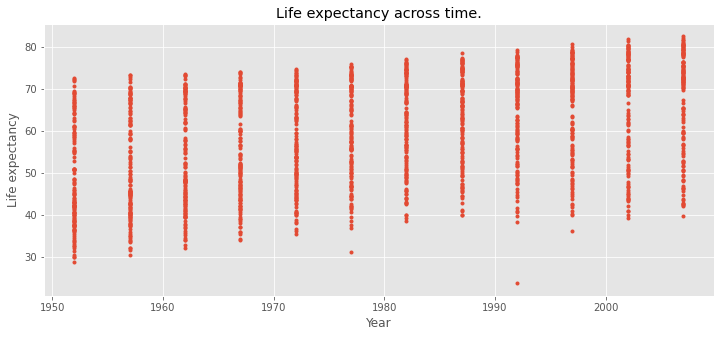

In [4]:

plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.plot(data.year, data.lifeExp, ".") # plot
plt.xlabel("Year")
plt.ylabel('Life expectancy')
plt.title('Life expectancy across time.')

generally, it seems existing  increasing linear trend.

####  Question 2

- the distributions in all years are skewed.
- before 1977, the distributions are clearly bimodal, thereafter unimodal.
- they are asymmetric.

#### Question 3

No, the linear relationship between year and life expectancy is very clear, as time goes, the life expectancy increases clearly.

The p-values for coef of year is closed to zero, therefore the null hypothese can be rejected.

#### Question 4

it would look similar with the plot of expectancy vs. year.


#### Question 5

according to assumption, it should be a pattern of normal distirbution, for example,, asymetric, unimodal.

### Excercise 2
#### Question 6

In [5]:
y = data.lifeExp # target
X = data.year # features
X = X.values.reshape(-1,1)

In [6]:

params = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # close form
params

array([0.03006768])

On average, the number is 0.0301

#### Question 7

In [7]:
# use statsmodel to check significancy
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          3.743e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:24   Log-Likelihood:                         -6748.2
No. Observations:                1704   AIC:                                  1.350e+04
Df Residuals:                    1703   BIC:                                  1.350e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0301      0.000    193.471      0.000       0.030       0.030
==============================================================================
Omnibus:                      963.786   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.361
Skew:                          -0.257   Prob(JB):                     2.42e-25
Kurtosis:                       1.846   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can reject it, with p_value close to 0, it is few chance that the coef equals zero.

### Excercise 3

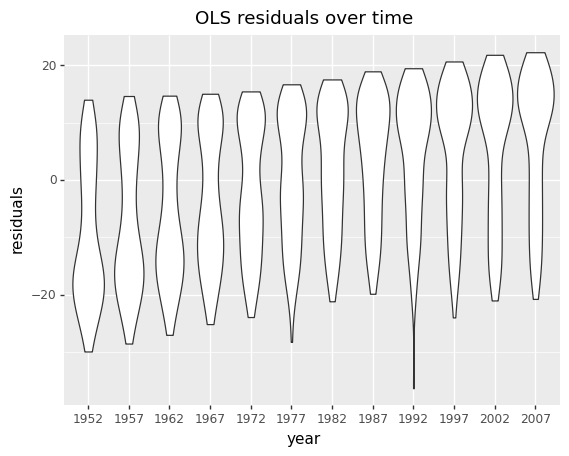

<ggplot: (148799677549)>

In [8]:
data['residuals'] = results.resid # plot
ggplot(aes(x='factor(year)', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="OLS residuals over time",
         x = "year",
         y = "residuals")

#### Question 8

yes, the pattern is same, only the scale of y-axis is different.

### Excercise 4
#### Question 9

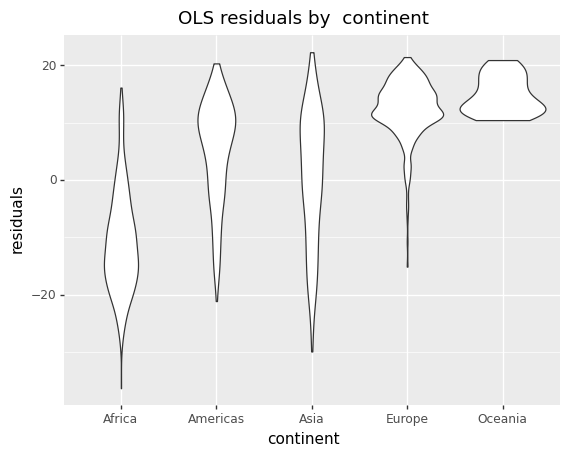

<ggplot: (148800736874)>

In [9]:
ggplot(aes(x='factor(continent)', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="OLS residuals by  continent",
         x = "continent",
         y = "residuals")

Yes, the distribution seems totally different by varying the continent, suggestion is that including continent as predictior in the regression model.

#### Excercise 5

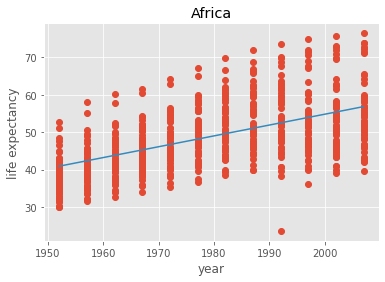

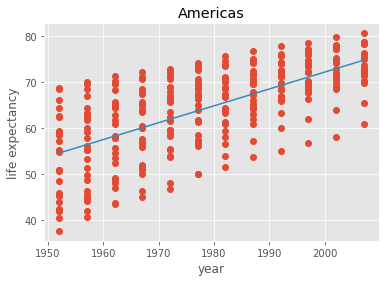

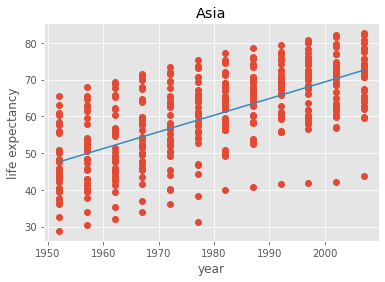

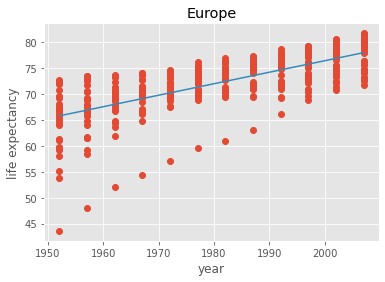

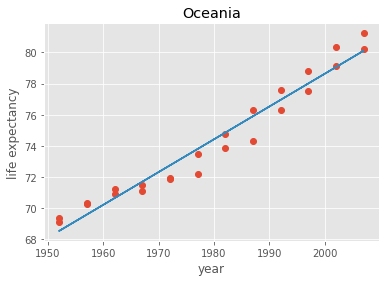

In [10]:

gs = data.groupby('continent')
for i, (gn, g_sc) in enumerate(gs):
    plt.figure()
    x = g_sc['year'].values
    y = g_sc['lifeExp'].values
    plt. plot(x, y, 'o') 
    m, b = np. polyfit(x, y, 1) 
    plt. plot(x, m*x + b)
    plt.title(gn) 
    plt.xlabel('year')
    plt.ylabel('life expectancy')
    plt.show()

#### Question 10

Yes, the increasing of lief expectancy show non linear pattern by most continent.


### Excercise 6
#### Question 11


In [11]:
yr = data.loc[:,'year'].copy()
interaction = pd.get_dummies(data[['continent']]).values * ((yr.values).reshape(-1,1)) # dummy variables of continent
X = np.concatenate((yr.values.reshape(-1,1), interaction), axis= 1)
X = X[:, :-1] # drop Ocean, use it as default 
y = data.lifeExp
params = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # solve regression
params
pd.DataFrame(params, index = ['year', 'continent_Africa', 'continent_Americas', 'continent_Asia',
       'continent_Europe'], columns = ['coef'])


,coef
year,0.037561
continent_Africa,-0.012855
continent_Americas,-0.004871
continent_Asia,-0.007185
continent_Europe,-0.001223


In [12]:

X = pd.DataFrame(X, columns=['year', 'continent_Africa', 'continent_Americas', 'continent_Asia',
       'continent_Europe']) # use stats to check significnace

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.550e+04
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:12:26   Log-Likelihood:                         -6145.5
No. Observations:                1704   AIC:                                  1.230e+04
Df Residuals:                    1699   BIC:                                  1.233e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                   0.0376      0.001     40.807      0.000       0.036       0.039
continent_Africa      -0.0129      0.001    -13.705      0.000      -0.015      -0.011
continent_Americas    -0.0049      0.001     -5.093      0.000      -0.007      -0.003
continent_Asia        -0.0072      0.001     -7.580      0.000      -0.009      -0.005
continent_Europe      -0.0012      0.001     -1.286      0.199      -0.003       0.001
==============================================================================
Omnibus:                       16.855   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.852
Skew:                          -0.186   Prob(JB):                     8.06e-05
Kurtosis:                       3.357   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the polynomial degree 1 of year in the interaction, in the results, the continent_Europe's coef is not significant. 

#### Question 12

In the model, we use Ocean as base, the expetancy increase per year for each continent is below.

In [13]:
increase = results.params + results.params[0]
increase[0] = results.params[0]
increase

year                  0.037561
continent_Africa      0.024706
continent_Americas    0.032690
continent_Asia        0.030376
continent_Europe      0.036338
dtype: float64

### Excercise 8

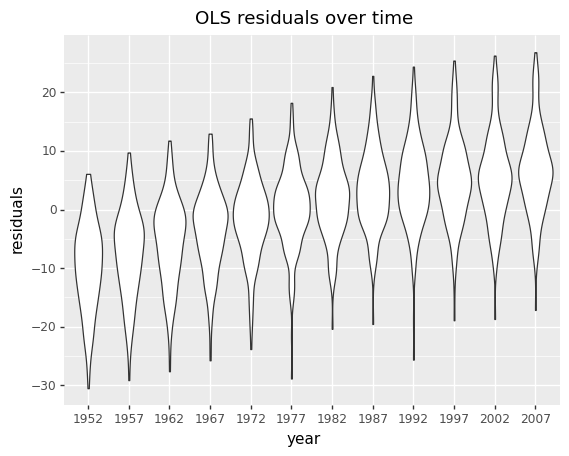

<ggplot: (148800882282)>

In [14]:
data['residuals'] = y - X @ params
ggplot(aes(x='factor(year)', y='residuals'), data=data) +\
    geom_violin() +\
    labs(title="OLS residuals over time",
         x = "year",
         y = "residuals")

The assumption is better meet than last model, the residual seems more like normal distributed.

## Part 2

### Probleme 1

In [15]:
def ols_sgd(X, y, T, alpha):
    m, n = X.shape # shape of features, n is number of features, m is obeservation number
    theta = np.zeros(n) # initial coefs
    for epoch in range(T): # loop epoches
        for row,y_row in zip(X, y): # loop thro observations
            yhat = theta[0]
            for i in range(len(row) - 1):
                yhat += theta[i + 1] * row[i] # prediction
            error = yhat - y_row # error
            theta[0] = theta[0] - alpha * error # update
            for i in range(len(row)-1):
                theta[i + 1] = theta[i + 1] - alpha * error * row[i] # update
    return theta

#### Problem 2

#### Problem 3

In [16]:

def lgr_sgd(X, y, T, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(T):
        for row,y_row in zip(X, y):
            yhat = theta[0]
            for i in range(len(row) - 1):
                yhat += theta[i + 1] * row[i]
            yhat = 1./(1. + exp(-yhat))
            error =  y_row -yhat
            theta[0] = theta[0] + alpha * error * yhat * (1. - yhat) # update
            for i in range(len(row)-1):
                theta[i + 1] = theta[i + 1] + alpha * error * yhat * (1.- yhat) * row[i] # update
    return theta

#### Problem 4

In [17]:
# Generate data for linear regression:
import sklearn.datasets
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

In [18]:
ols_fit = ols_sgd(gen_data_x, gen_data_y, 100, 0.01) # estimations ols_sgd
lgr_fit = lgr_sgd(log_gen_data_x, np.array(log_gen_data_y), 100, 0.3) # estimations logit sgd

In [20]:
# sklearn estimations

model =LogisticRegression().fit(log_gen_data_x, np.array(log_gen_data_y).reshape(-1,1))
skl_lgr = model.coef_
model = LinearRegression().fit(gen_data_x, gen_data_y)
skl_ols = model.coef_

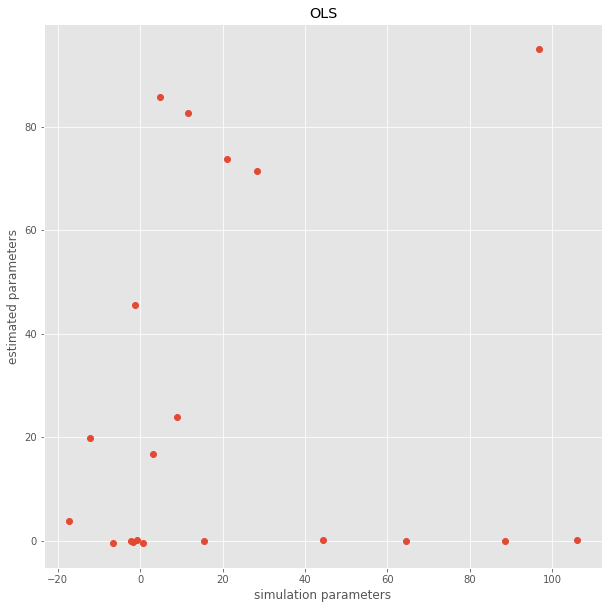

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(ols_fit, skl_ols, 'o') # plot
plt.xlabel('simulation parameters')
plt.ylabel('estimated parameters')
plt.title("OLS")
plt.show()

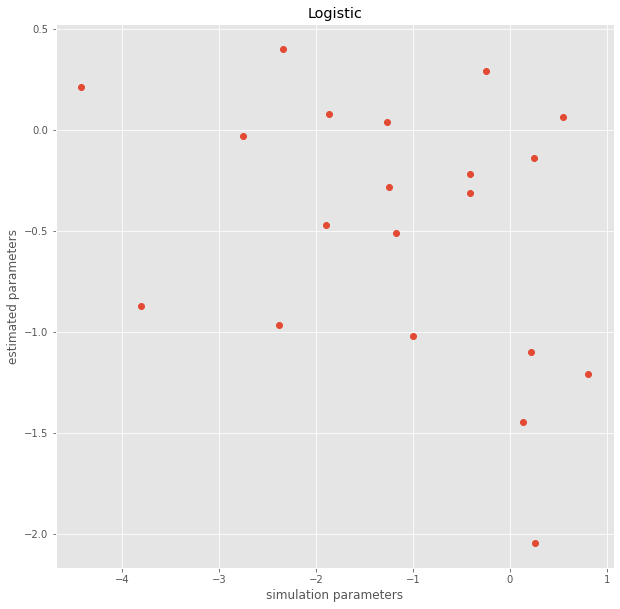

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(lgr_fit, skl_lgr[0], 'o') # plot
plt.xlabel('simulation parameters')
plt.ylabel('estimated parameters')
plt.title("Logistic")
plt.show()

## Part 3

The outcome of is win/loss of chess game play, predictors are sequence of position.

In [23]:
## your code here
cols = ["bkblk","bknwy","bkon8","bkona","bkspr","bkxbq","bkxcr","bkxwp","blxwp","bxqsq","cntxt","dsopp","dwipd",
 "hdchk","katri","mulch","qxmsq","r2ar8","reskd","reskr","rimmx","rkxwp","rxmsq","simpl","skach","skewr",
 "skrxp","spcop","stlmt","thrsk","wkcti","wkna8","wknck","wkovl","wkpos","wtoeg","won"]
input_df = pd.read_csv('kr-vs-kp.data',header=None, names=cols )
input_df['won'] = input_df['won'] == 'won'
input_df.tail()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,won
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,False
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,False
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,False
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,False
3195,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,False


In [24]:
# converting string to numeric
value_dict = {'f': 1, 'l': 2, 'n': 3, 't': 4, 'w': 5, 'b': 6, 'g': 7}

for key in value_dict.keys():
    input_df = input_df.replace(key, value_dict[key])
input_df.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,won
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,True
1,1,1,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,True
2,1,1,1,1,4,1,4,1,1,1,...,1,1,1,1,1,1,4,4,3,True
3,1,1,1,1,1,1,1,1,4,1,...,1,1,1,1,1,1,4,4,3,True
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,True


In [25]:
# split data to features and labels ,check balance of data
features = input_df[input_df.columns[:-1]].copy()
labels =  input_df[['won']].copy()

In [26]:
pd.DataFrame( np.unique(labels.values, return_counts=True))

,0,1
0,False,True
1,1527,1669


In [27]:
# train test splitting
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.75)


In [28]:
# tuning hyperparameter, C is Regularization parameter, gmma Kernel coefficient, and kern type.

params = {'C': [1, 10, 100, 1000], 
              'gamma': [1e-4, 1e-3, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(),params)
grid.fit(train_features,np.array(train_labels).ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']})

In [29]:
grid.best_params_ # best hyper parameters

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [30]:
y_pred = grid.predict(test_features) # performance

print("Classification Report:\n", classification_report(test_labels, y_pred))

print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       377
        True       0.99      0.99      0.99       422

    accuracy                           0.99       799
   macro avg       0.99      0.99      0.99       799
weighted avg       0.99      0.99      0.99       799

Confusion Matrix:
 [[374   3]
 [  4 418]]


#### KNN

In [31]:

knn_2 = KNeighborsClassifier(2) # for binanry classification, K is two
knn_2.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=2)

#### Comparing

In [32]:
input_df = input_df * 1 # change boolen to numeric
input_df.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,won
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,1
1,1,1,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,1
2,1,1,1,1,4,1,4,1,1,1,...,1,1,1,1,1,1,4,4,3,1
3,1,1,1,1,1,1,1,1,4,1,...,1,1,1,1,1,1,4,4,3,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,4,4,3,1


In [33]:
# sclicing data to 10 pieces

ids = list(input_df.index)
shuffle(ids)
input_df = input_df.iloc[ids,:]
k = 10
n = round(input_df.shape[0]/k)
z = 0
slice_df = [np.nan] *k
for i in range(k):
    slice_df[i] = input_df[z: np.min([z+n, input_df.shape[0]])]
    z = z+n  

In [34]:

svc_scores = [] # will will use accuracy as metric, and the accuracy scores in each fold will be stored.
knn_scores = []
lgr_scores = []
svc_err = [] # prediction error
knn_err = []
lgr_err = []
for i in range(10):
    test = slice_df[i].copy() # validation part
    train = pd.concat([slice_df[j] for j in range(10) if j != i], axis=0).copy() #train part
    train_features = train[train.columns[:-1]].copy() # features
    train_labels = train[['won']].copy() # labels
    train_features = test[test.columns[:-1]].copy()
    train_labels = test[['won']].copy()
    svc = SVC(kernel='rbf', C=1000, gamma= 0.01) #svc model
    pred = svc.fit(train_features, train_labels).predict(test_features) # svc prediction
    scr = accuracy_score(test_labels, pred) # accuracy score
    svc_scores.append(scr)
    svc_err.append(test_labels.values.reshape(-1) - pred)
    
    knn_2 = KNeighborsClassifier(2) # knn
    pred = knn_2.fit(train_features,train_labels).predict(test_features)
    scr = accuracy_score(test_labels, pred)
    knn_scores.append(scr)
    knn_err.append(test_labels.values.reshape(-1) - pred)
    
    lgr = lgr_sgd(train_features.values, train_labels.values, alpha=0.3, T = 10) @ test_features.values.T # logit
    scr = accuracy_score((lgr > 0.5) * 1, test_labels)
    lgr_scores.append(scr)
    lgr_err.append(test_labels.values.reshape(-1) - (lgr > 0.5) * 1)
svc_err =np.concatenate(svc_err)
knn_err =np.concatenate(knn_err)
lgr_err =np.concatenate(lgr_err)
    

In [35]:
accuracy_df = pd.DataFrame([svc_scores, knn_scores, lgr_scores], index=['svc', 'knn', 'logit']).T # result

In [36]:
accuracy_df.mean() # result

svc      0.945557
knn      0.797247
logit    0.521902
dtype: float64

In [37]:
err_df = pd.DataFrame([svc_err, knn_err, lgr_err], index=['svc', 'knn', 'logit']).T # result erro estimation
err_df_standard = err_df ** 2
err_df_standard.head()

,svc,knn,logit
0,0,1,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,1,0


In [38]:
err_df_standard.describe()

,svc,knn,logit
count,7990.000000,7990.000000,7990.000000
mean,0.054443,0.202753,0.478098
std,0.226904,0.402076,0.499551
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [39]:
stats.ttest_ind(err_df_standard.svc, err_df_standard.logit) # reject mean equal hypothesis

Ttest_indResult(statistic=-69.02006534709078, pvalue=0.0)

In [40]:
stats.ttest_ind(err_df_standard.knn, err_df_standard.logit)# reject mean equal hypothesis

Ttest_indResult(statistic=-38.38081251981124, pvalue=2.2776492423052613e-308)

In [41]:
stats.ttest_ind(err_df_standard.knn, err_df_standard.svc)# reject mean equal hypothesis

Ttest_indResult(statistic=28.714557004997538, pvalue=7.540086596343222e-177)